## A4_1 : Principle Component Analysis and Factor Analysis
                            Gauri Vinod Nair
                            V01110160

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn factor_analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 693.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=5f7981d134016e8c254526a26b601be332450b00c11569bd43203cc5c3a2ae09
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

In [2]:
# Load the dataset
df = pd.read_csv('Survey.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,City,Sex,Age,Occupation,Monthly Household Income,Income,Planning to Buy a new house,Time Frame,Reasons for buying a house,what type of House,...,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages,sex,Finished/Semi Finished.1,Influence Decision.1
0,Bangalore,M,26-35,Private Sector,"85,001 to105,000",95000,Yes,6M to 1Yr,Residing,Apartment,...,1,9,1200,72.5,30000,42500,30.5,M,Semifurnished,Site visits
1,Bangalore,M,46-60,Government/PSU,"45,001 to 65,000",55000,Yes,6M to 1Yr,Investment,Apartment,...,2,9,800,32.5,120,27500,53.0,M,Semifurnished,Newspaper
2,Bangalore,F,46-60,Government/PSU,"25,001 to 45,000",35000,Yes,<6 Months,Rental Income,Apartment,...,4,3,400,12.5,10000,10000,53.0,F,Semifurnished,Hoarding
3,Bangalore,M,36-45,Private Sector,>125000,200000,Yes,<6 Months,Investment,Apartment,...,5,3,1600,102.5,70000,80000,40.5,M,Furnished,Electronic/Internet
4,Bangalore,M,26-35,Self Employed,"85,001 to105,000",95000,Yes,1-2 Yr,Residing,Apartment,...,3,18,800,52.5,30000,42500,30.5,M,Semifurnished,Electronic/Internet


In [4]:
# Data preprocessing
# Check for missing values
print(df.isnull().sum())

City                                         0
Sex                                          0
Age                                          0
Occupation                                   0
Monthly Household Income                     0
Income                                       0
Planning to Buy a new house                  0
Time Frame                                   0
Reasons for buying a house                   0
what type of House                           0
Number of rooms                              0
Size of House                                0
Budget                                       0
Finished/Semi Finished                       0
Influence Decision                           0
Maintainance                                 0
EMI                                          0
1.Proximity to city                          0
2.Proximity to schools                       0
3. Proximity to transport                    0
4. Proximity to work place                   0
5. Proximity 

In [5]:
# Select numerical columns for PCA
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numerical = df[numerical_cols]

In [6]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

C:\Users\gauri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


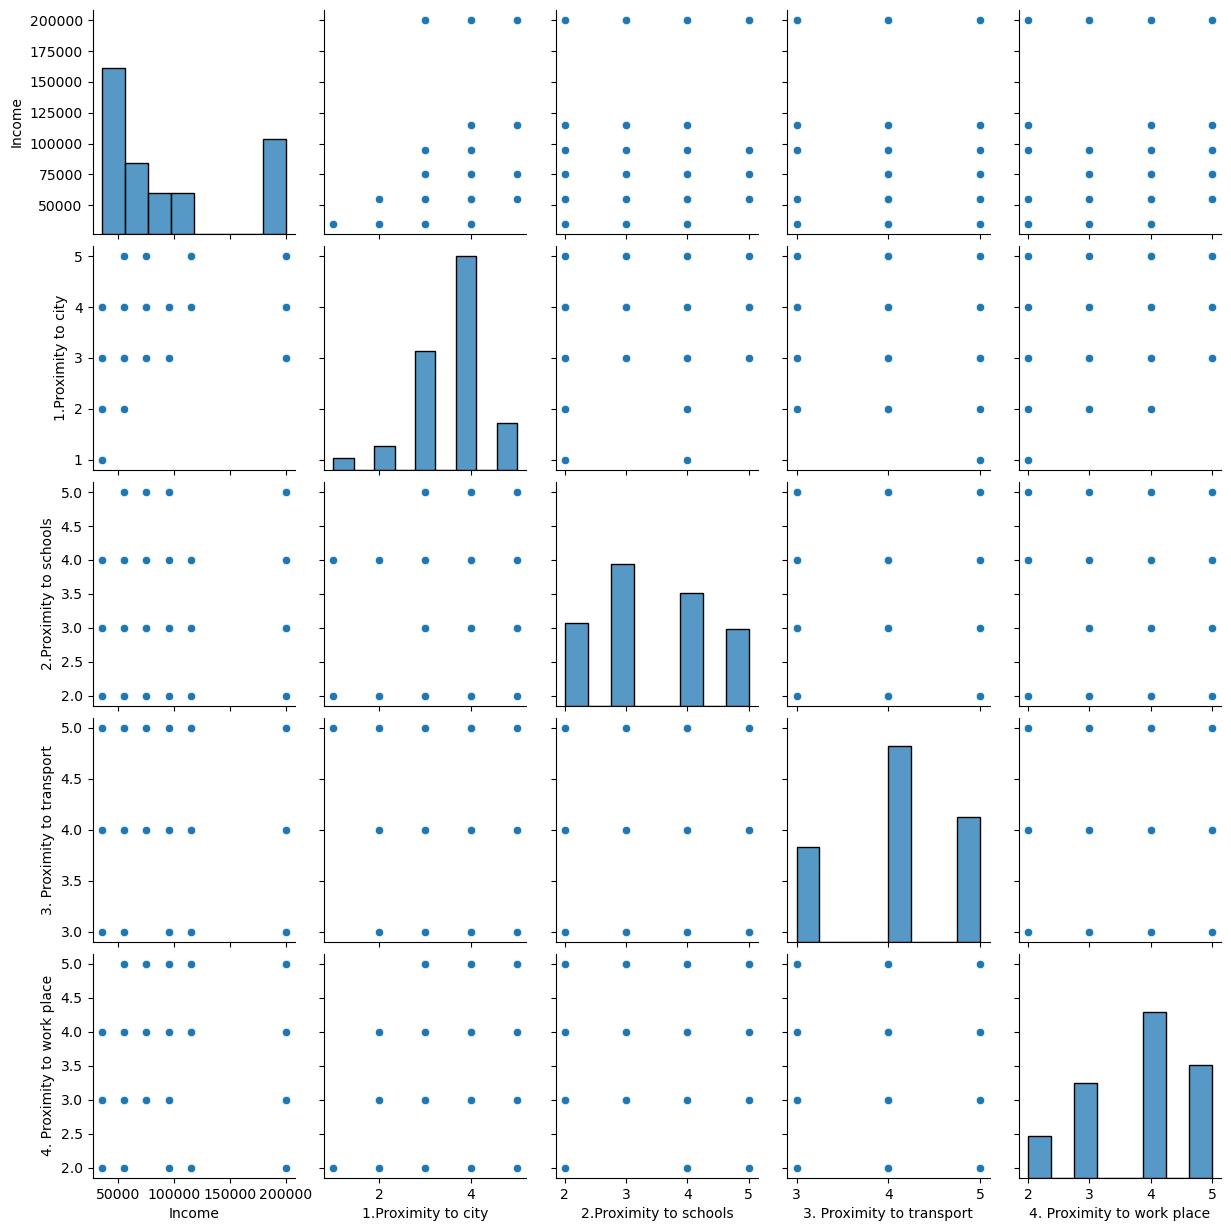

In [7]:
# Exploratory Data Analysis (EDA)
# Pairplot for initial exploration (only for a few columns to keep it simple)
sns.pairplot(df_numerical.iloc[:, :5])
plt.show()

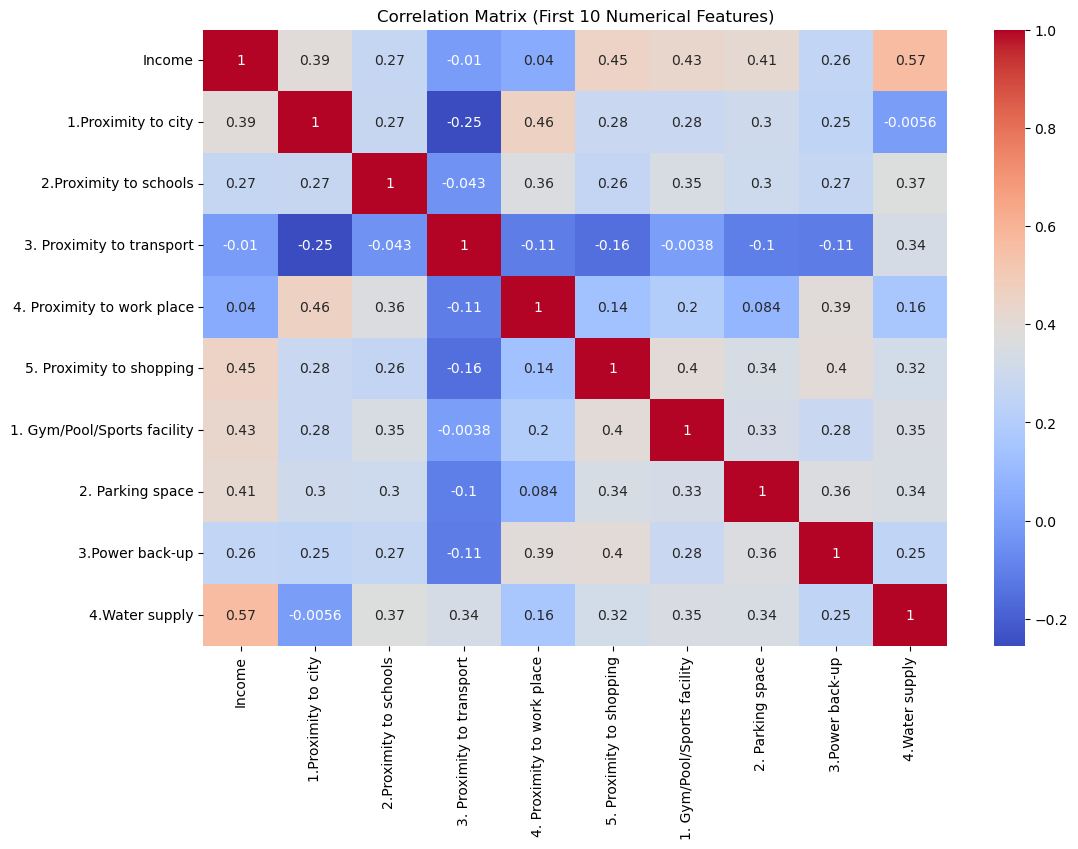

In [8]:
# Correlation matrix (only for a few columns to keep it simple)
corr_matrix = df_numerical.iloc[:, :10].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (First 10 Numerical Features)')
plt.show()

In [9]:
# Principal Component Analysis (PCA)
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

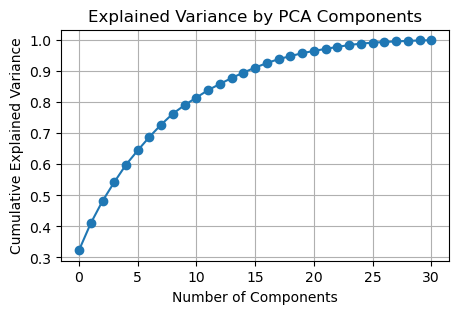

In [10]:
# Plot explained variance
plt.figure(figsize=(5, 3))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [11]:
# Choose number of components (e.g., based on explained variance > 90%)
n_components = np.argmax(np.cumsum(explained_variance) > 0.9) + 1
print(f'Number of components explaining > 90% variance: {n_components}')

Number of components explaining > 90% variance: 16


In [12]:
# Apply PCA with chosen number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

In [13]:
# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.395665  3.344539 -0.064330 -1.406127 -0.485593 -0.844473  2.652029   
1  3.444209  3.048899  0.593606 -1.394919 -1.733891 -0.625470  0.986230   
2  4.187523  3.464776  4.912955 -0.032116  0.599081 -0.801910 -0.429968   
3 -6.162837  2.499158 -0.975129  1.732595  1.594441  0.493891 -1.153103   
4  0.595632 -0.695060 -0.282062  2.027460  0.953959  1.341886  2.169312   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -2.648677 -0.303813  2.606353 -1.047822 -0.574662 -0.006149 -0.336880   
1 -2.277692 -1.481814  0.265434  0.797991  0.707519 -0.113378 -1.616740   
2  0.016719 -1.726154 -0.042737 -0.156842 -0.161647  0.103485  0.394578   
3 -0.796470 -0.005058  1.109969 -0.089639 -0.224403  0.496322  2.120295   
4 -1.289123  0.628752 -0.615761  1.452871  0.036282 -1.435299  1.439186   

       PC15      PC16  
0  0.344732  0.490162  
1  2.036729  1.126408  
2 -1.099967 -0.266216  
3 

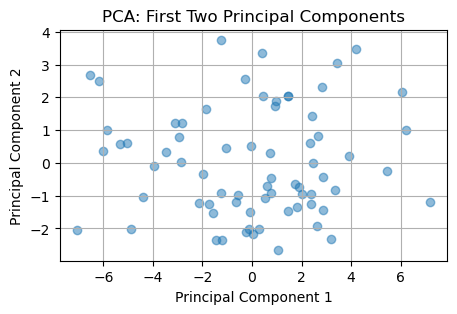

In [14]:
# Plot the first two principal components
plt.figure(figsize=(5, 3))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.grid()
plt.show()

In [15]:
# Factor Analysis (FA)
# Determine the number of factors using the Kaiser criterion (Eigenvalues > 1)
fa = FactorAnalyzer()
fa.fit(df_scaled)
ev, v = fa.get_eigenvalues()

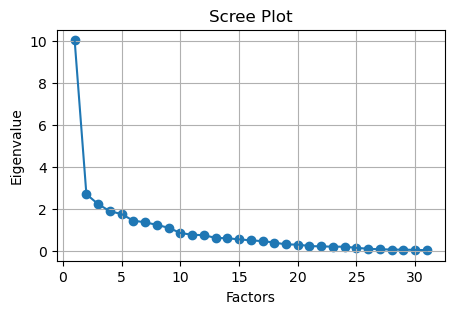

In [16]:
# Scree plot to visualize eigenvalues
plt.figure(figsize=(5, 3))
plt.scatter(range(1, len(ev) + 1), ev)
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [17]:
# Choose the number of factors (e.g., based on eigenvalues > 1)
n_factors = sum(ev > 1)
print(f'Number of factors with eigenvalue > 1: {n_factors}')

Number of factors with eigenvalue > 1: 9


In [18]:
# Apply Factor Analysis with the chosen number of factors
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_scaled)
df_fa = fa.transform(df_scaled)

In [19]:
# Convert FA result to DataFrame
df_fa = pd.DataFrame(df_fa, columns=[f'Factor{i+1}' for i in range(n_factors)])
print(df_fa.head())

    Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
0 -0.276354 -1.332579  1.220591 -0.438343  2.029218  1.019731 -2.852032   
1 -0.462125 -0.914548 -1.057955 -0.671525  0.561223  0.173179 -2.227089   
2 -1.002985  1.073067 -1.604300 -2.861120  0.783767 -1.144909 -1.253325   
3  0.551724  1.843733  1.292494  0.928167  0.104951 -1.336203 -0.859037   
4 -0.557889 -0.143181  1.310599 -0.319706 -0.718088  0.844366 -0.799882   

    Factor8   Factor9  
0  0.858403  0.265840  
1  1.590657  0.086988  
2  0.663674 -0.166581  
3  0.451625 -1.573431  
4 -0.771397 -0.949776  


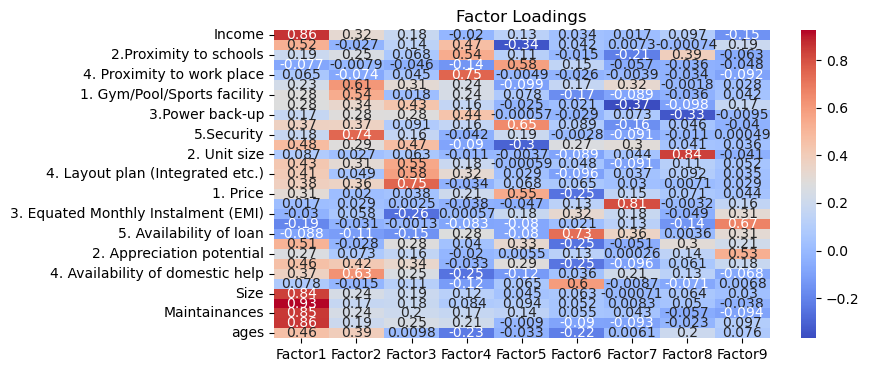

In [20]:
# Visualize factor loadings
loadings = pd.DataFrame(fa.loadings_, index=df_numerical.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Factor Loadings')
plt.show()